In [1]:
import py2neo

In [7]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="movie")

In [ ]:
#1)How many actors played in more than 2 movie ? Get their names and year they were born.

In [8]:
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
with play, count(m) as film where film > 2
return play
"""
graph.run(query)

play
"(_4:Person {born: 1960, name: 'Hugo Weaving'})"
"(_3:Person {born: 1961, name: 'Laurence Fishburne'})"
"(_2:Person {born: 1967, name: 'Carrie-Anne Moss'})"


In [14]:
#2)In how many movies did Tom hanks play ?
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person{name:"Tom Hanks"})
with count(play.name) as number
return number
"""
graph.run(query)
result = graph.run(query)

for record in result:
    tom_hanks_movies = record[0]
    print("Tom Hanks Movies :",tom_hanks_movies)

Tom Hanks Movies : 24


In [17]:
#3)In average in how many movies do actors play in ?
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
WITH play, count(m) AS film
RETURN avg(film) AS averageMovies
"""
result = graph.run(query)

for record in result:
    average_movies = round(record["averageMovies"], 2)
    print("Average number of movies per actor: ", average_movies)


Average number of movies per actor:  1.64


In [30]:
#4)In average how many actors are there in a movie ?
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
WITH m, count(DISTINCT play) as actorCount
RETURN avg(actorCount) as averageActors
"""
result=graph.run(query)
for record in result:
    average_actors = round(record["averageActors"], 2)
    print("Average number of movies per actor: ", average_actors)


Average number of movies per actor:  4.5


In [34]:
#5)In average how many writers is needed to write a movie ?
query= """
MATCH (P:Person)-[:WROTE]->(m:Movie)
with m,count(P.name) as nombre
RETURN avg(nombre)
"""
result=graph.run(query)
for record in result:
    average_writers = round(record["avg(nombre)"], 2)
    print("Average writers to write a movie ", average_writers)

Average writers to write a movie  1.29


In [35]:
#6)What is the proportion of writers that also directed the movie ?
query= """
MATCH (m:Movie)<-[:WROTE]-(w:Writer)-[:DIRECTED]->(m)
RETURN COUNT(DISTINCT w) AS writerDirectorCount
"""
result=graph.run(query)
for record in result:
    average_writers = round(record["avg(nombre)"], 2)
    print("Average writers to write a movie ", average_writers)

writerDirectorCount
0


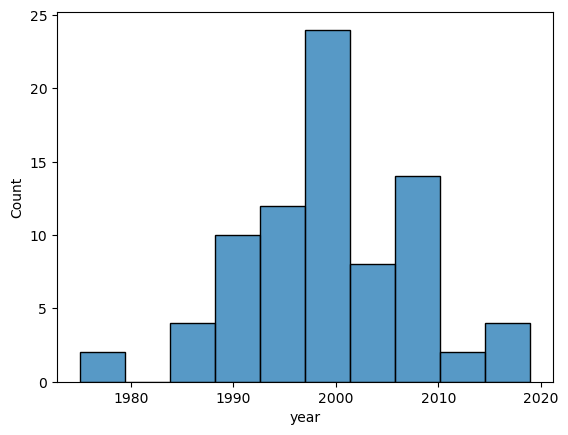

In [37]:
#7)Do an histogram of the year of release for the movies.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Execute the Cypher query
query = "MATCH (m:Movie) RETURN m.released AS year"
result = graph.run(query)

# Fetch the results into a Pandas DataFrame
data = pd.DataFrame([dict(record) for record in result])

# Plot the histogram using Seaborn
sns.histplot(data=data, x='year')

# Show the plot
plt.show()


In [39]:
#8)Who are the 10 actors with the most movie played in
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
return play.name ,count(m) as nombre_films
Order by nombre_films desc
Limit 10
"""
graph.run(query)

play.name,nombre_films
Tom Hanks,24
Keanu Reeves,14
Meg Ryan,10


In [41]:
#9) Delete every movie made by a director of your choosing
query="""
MATCH (p:Person{name:"James Marshall"})-[:DIRECTED]->(m:Movie)
DETACH DELETE m
"""
graph.run(query)

(No data)

In [42]:
# 10) Give some statistics that you find interesting.
# date oldest movie and newest movie
query="""
MATCH (m:Movie)
RETURN min(m.released) AS oldestMovie, max(m.released) AS newestMovie
"""
graph.run(query)

oldestMovie,newestMovie
1975,2019


In [45]:
#oldest actor
query="""
MATCH (p:Person)
WHERE exists(p.born)
RETURN p.name AS actor, p.born AS birthYear
ORDER BY birthYear ASC
LIMIT 1
"""
graph.run(query)

actor,birthYear
Max von Sydow,1929


In [50]:
#11) Sandbox exercise: think of a problematic and try to answer it.
##unique movie release years
query="""
MATCH (m:Movie)
RETURN DISTINCT m.released AS releaseYear
ORDER BY releaseYear ASC
"""
graph.run(query)


releaseYear
1975
1986
1990
